На основании данных полетов предложить функции и метрики личного кабинета мобильного приложения-трекера полетов. Сформулировать гипотезы, которые нужно проверить перед принятием решения о старте проекта. Сделать дескриптивный анализ данных. Проверить гипотезы с помощью машинного обучения. Написать выводы и рекомендации. 


Канвас. Ценности и боли клиента.  Боли. Ожидание в аэропорту в неизвестности при задержке рейса (1). Если клиент дождался посадки - неизвестность задержки прибытия (2). Неопределенность выбора (3) - сдать билет при задержке и купить новый или дождаться своего рейса. Опоздание на рейс (4). Ценности: информация о времени ожидания (1). При задержке - помощь выбора (2), сдать билет, или ждать, получив еду и напитки. Если сдал билет - подсказать рейс на основе вероятности задержки вылета/отмены (3). Рачет времени прибытия на основе регрессии (4). Если опаздывает на рейс по геолокации определить, что не на месте и прислать сообщение о том, что опаздывает не только он (4). В США пассажир имеет право сдать билет и получить деньги при зедержке, или требовать питание, но тогда возврат суммы билета будет частичным. 

Гипотеза - прогнозирование события отмены на основе минимального числа признаков, двух или трех. Качественное основание - крупные аэропорты представляют собой хабы, их емкость по одновременному принятию N рейсов повышает риски. Чем крупнее хаб - тем выше риски каскадного эффекта задержек рейса. Основание основания - доклад комиссии по гражданской авиации США.


In [1]:
print('Привет!')

Привет!


Не выводить предупреждения:

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Библиотека для работы с массивами и таблицами

In [3]:
import numpy as np
import pandas as pd
from pandas import set_option

Библиотеки для работы для работы с графикамии

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

Библиотека для создание сортированного сета данных из стандартного сета

In [5]:
from ordered_set import OrderedSet

Импорт статистических объектов для расчета корелляции из библиотеки scipy и среднего - из statistics 

In [6]:
from scipy.stats.stats import pearsonr
from statistics import mean

Импорт стандартной библиотеки математических функций

In [7]:
import math

Загрузка класса для анализа методом главных компонент из библиотеки sklearn

In [8]:
from sklearn.decomposition import PCA

Загрузка класса ridge-regression для создания регрессии с L2 регуляризацией

In [9]:
from sklearn.linear_model import Ridge

Загружаем из sklearn классификаторы: решающие деревья+логистическая регрессия+наивный байесовский классификатор

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

Загружаем случайный лес из модуля  для предварительного отбора признаков машинного обучения

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

Загружаем 3 модуля для кросс валидации и стандартного out-of-sample скоринга ML моделей - 2 независимых метода проверки. Последний класс включает методы для разбиение сета данных

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

Создаем гиперпараметр split_num, который показывает на сколько подмножеств разбивать сет данных. Число интервалов для
эмпирической функции распределения по частоте. Название файла с датой.

In [20]:
split_num=10#number of splits for cv
intervals=30#number of splits for EDF
filename='flights.xlsx'

Создаем собственные функции в скрипте, было бы разумнее их загрузить в отдельный модуль и импортировать его, но для демо..

Функция для стандартизации данных к интервалу 0,1 - повышает устойчивость ML моделей при обучении

In [21]:
def standart(x):
    max_value=x.max();
    min_value=x.min()
    z=(x-min_value) / (max_value - min_value)
    return z

Функция для построения корелляционной матрицы с тепловой картой используя модуль sns - для оценки потенциала регрессий

In [22]:
def cormap(x):
  corr=x.corr();fig=plt.figure(figsize=(10, 7))
  g=sns.heatmap(corr,annot=True,linewidths=.2, cbar_kws={"orientation": "horizontal"})
  plt.show()

Функция расчета коэффициент Пирсона между двумя векторами - стандартная корелляция

In [23]:
def cf(x,y):
  CFV=pearsonr(x,y);correlation=str(abs(round(int(100*CFV[0]))))
  p_mystake=str(round((100*CFV[1]),3));cf_mst=[correlation,p_mystake]
  return cf_mst

На основе библиотеки pandas функция для построения диаграмм рассеяния - за пределами диагонали - оценка линейной регрессии, выполняется долго. Зато 4 строчки кода для RnD. 

In [24]:
def eda(x):
  pd.plotting.scatter_matrix(x,figsize=[8,8],diagonal='kde',grid=True,ax=None,range_padding=1)
  plt.show()

Функция для факторного анализа на основе метода компонент - строит столбчатый график компонент и выводит их значения. На вход принимает список признаков и массив данных, на выходе график и логи

In [25]:
def pca(x,y):
  pca=PCA();pca.fit(y);PCA(copy=True)
  features=x;pca.explained_variance_=standart(pca.explained_variance_)
  pca.explained_variance_=list(np.array(pca.explained_variance_)*100)
  plt.bar(x, pca.explained_variance_,width=0.5);plt.xticks(features);plt.ylabel('variance');plt.xlabel('PCA feature')
  print('Вклад компонент в модели PCA:')
  for i in range(0,len(pca.explained_variance_)):
    print(str(x[i])+': '+str(int(pca.explained_variance_[i]))+'%')
    i=i+1
  plt.show()

csv импортирован в xls. Визуальный анализ структуры данных. Чать полей убрал - сократил размерность. 
Парсим дату из xls файла. 

In [26]:
df=pd.read_excel(filename)

Все признаки:Unique Carrier,DepDelay,Origin,Dest,Cancelled,Distance,AirTime,ActualElapsedTime,CRSElapsedTime,ArrDelay
Непрерывные признаки: DepDelay, Distance, AirTime, ActualElapsedTime, CRSElapsedTime, ArrDelay
Булевые признаки: Unique Carrier,DepDelay, Origin, Dest, Cancelled

Смотрим, насколько часто проиходит событие задержка или отмена. В идеале для устойчивого обучения - 50 на 50

In [27]:
delay_bool_sum=len(df[df['DepDelay']>0])+len(df[df['Cancelled']==1])
delay_freq=round(100*delay_bool_sum/len(df))
print('\n[Delay+Cancelation] частота: '+str(delay_freq)+'%')


[Delay+Cancelation] частота: 41%


Почти 50/50. Можно начинать ML. Но перед этим проверим, работает ли стандартная статистика, которая предполагает нормальное распределение ошибок, отсутствие нелинейнойнойсти и каскажных эффектов. Гипотеза - не работает, но интуитивный курс движения может дать.

Из двух столбцов - отмена (булевая переменная) и задержка (непрерывная переменная) создаем один столбец-вектор с булевым значением 1, если задержка есть, или есть отмена. Техническая причина биннинга - моделей классификации значительно больше и при стекинге можно добиться лучшего результата. Для проверки гипотез - достаточно. Меньше столбцов - меньши риски overfit

In [28]:
boolean_delay=[]
canc_list=list(df['Cancelled']);delay_list=list(df['DepDelay'])
for i in range(len(canc_list)):
    if ((canc_list[i]==1) or (math.isnan(delay_list[i])=='False' and delay_list[i]>0)): boolean_delay.append(1)
    else: boolean_delay.append(0)     

df['Bool_delay']=np.array(boolean_delay);#create new field, merged from two - dimension reduction
del df['Cancelled']#remove cancelation field

Названия аэропотртов - строки. Необходимо преобразовать в численный вид, чтобы использовать, как фичи. Для этого вначале из них делаем сортированные сеты, при помощи словаря ставим каждому коду аэропорта в соответствие целое число. Преобразуем столбцы фрейма. Эти фичи будут в дальнейшем использоваться для классификаторов.

In [29]:
carrier_set=list(OrderedSet(df['UniqueCarrier'][:]));carrier_ind=range(len(carrier_set));carrier_dict=dict(zip(carrier_set,carrier_ind))
origin_set=list(OrderedSet(df['Origin'][:]));origin_ind=range(len(origin_set));origin_dict=dict(zip(origin_set,origin_ind))
dest_set=list(OrderedSet(df['Dest'][:]));dest_ind=range(len(dest_set));dest_dict=dict(zip(dest_set,dest_ind))

df['UniqueCarrier']=[carrier_dict[item] for item in df['UniqueCarrier']]
df['Origin']=[origin_dict[item] for item in df['Origin']]
df['Dest']=[dest_dict[item] for item in df['Dest']]

Изначально непрерывные фичи стандартизируем - задержка, дистанция, время полета, задержка прибытия и т.д. На основании них смотрим корелляторы - пытаемся закрыть ценность номер три - см. выше. Стандартизация - устойчивость регрессии, если она возможна.

In [30]:
df['DepDelay']=standart(df['DepDelay']);df['Distance']=standart(df['Distance'])
df['AirTime']=standart(df['AirTime']);df['ActualElapsedTime']=standart(df['ActualElapsedTime'])
df['CRSElapsedTime']=standart(df['CRSElapsedTime']);df['ArrDelay']=standart(df['ArrDelay'])

Для удобства строим отдельный датафрейм по непрерывным фичам, убираем записи с пустыми значениями - очищаем данные

In [31]:
df_delay=df.copy()
df_delay=df_delay.dropna()
df_delay=pd.concat([df_delay['DepDelay'],df_delay['Distance'],df_delay['AirTime'],df_delay['ActualElapsedTime'],
                    df_delay['CRSElapsedTime'],df_delay['ArrDelay']], axis=1)

df_delay_arrival=pd.concat([df_delay['DepDelay'],df_delay['DepDelay'],df_delay['ArrDelay']], axis=1)
df_delay_arrival.columns=['DepDelay1','DepDelay2','ArrDelay']

Строим корелляционную цветовую матрицу между фичами.

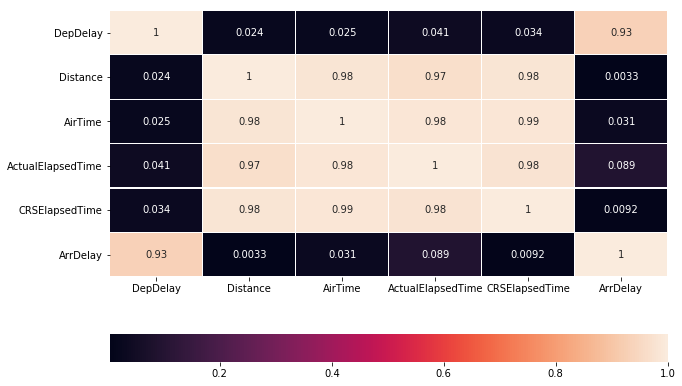

In [32]:
cormap(df_delay)

Задержка прибытия ArrDelay имеет корелляцию 93% с задержкой вылета. Т.е. клиент может сразу получить эту инфу, а сравнить с расчетным временем прибытия, которое рассчитывается с учетом погоды. Но погода не при чем, т.к. время в воздухе и дистанция имеют корелляцию 97%. 

Дополним диаграммой рассеяния гипотезу. Это очень медленная библиотека. Юпитер ушел считать кольца Сатурна. 

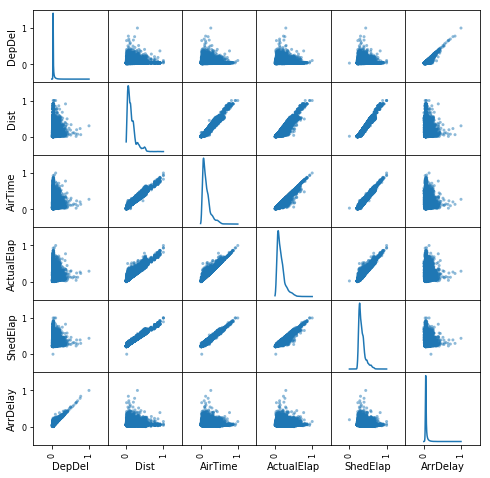

In [33]:
df_delay.columns=['DepDel','Dist','AirTime','ActualElap','ShedElap','ArrDelay']
eda(df_delay)

Прекрасная регрессия на диаграмме рессеяния между задержками. Все непрервывные величины имеют степенное распределение
недосаточно среднего и дисперсии для его характеристики. Необходимы как минимум 3 и 4 моменты.

Делаем дескриптивный анализ для задержек. 

In [34]:
set_option('display.width',100)
set_option('precision',3)

print('Department delay:')
description=df_delay_arrival['DepDelay1'].describe()
print(description)

Department delay:
count    68418.000
mean         0.046
std          0.029
min          0.000
25%          0.034
50%          0.037
75%          0.045
max          1.000
Name: DepDelay1, dtype: float64


In [35]:
print('ArrDelay:')
description=df_delay_arrival['ArrDelay'].describe()
print(description)

ArrDelay:
count    68418.000
mean         0.063
std          0.031
min          0.000
25%          0.048
50%          0.054
75%          0.066
max          1.000
Name: ArrDelay, dtype: float64


Надо убедиться, что стандартные отклонения фич сопоставимы. Это условие устойчивости регрессии по коэффициентам - в смысле устойчивости по Ляпунову.

In [37]:
column_names=df_delay.columns

Вклад компонент в модели PCA:
DepDel: 100%
Dist: 4%
AirTime: 1%
ActualElap: 0%
ShedElap: 0%
ArrDelay: 0%


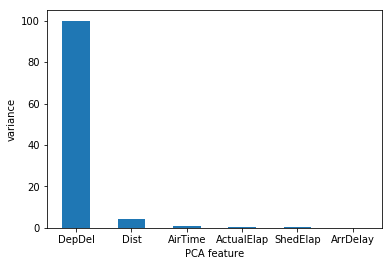

In [38]:
pca(column_names,df_delay)

Метод главных компонент намекает, что необходимо в первую очередь смотреть на задержки вылета, т.к. эта переменная вносит
наибольших вклад в разброс...шестимерного эллипсоида. 

Строим регрессию между задержками вылета/приземления с регуляризацией. В качестве функции потерь - R2. Делаем кросс валидацию и выводим среднее и отклонение для функции потерь.

In [39]:
array_reg=df_delay_arrival.values
X_reg=array_reg[:,0:2];Y_reg=array_reg[:,2]
kfold=KFold(n_splits=split_num, random_state=7);model=Ridge()
results=cross_val_score(model, X_reg, Y_reg, cv=kfold, scoring='r2')
print('Среднее R2 для Ridge Regression:',round(results.mean(),2))
print('Отклонение R2 для Ridge Linear Regression:',round(results.std(),2))

Среднее R2 для Ridge Regression: 0.86
Отклонение R2 для Ridge Linear Regression: 0.01


Ожидаемо хорошая валидация на истории. Опцию (4) - подсказка задержка прибытия вполне можно потестить и прикрутить метрику. 

Переходим к классификаторам, чтобы оценить опцию рекоммендации рейса, при сдаче билета. Перед этим необходимо стандартизировать номера аэропортов и перевозчиков к интервалу (0,1) - повышение устойчивости обучения.

In [40]:
df['Origin']=standart(df['Origin'])
df['Dest']=standart(df['Dest'])
df['UniqueCarrier']=standart(df['UniqueCarrier'])

Создаем отдельный датафрейм и массив для классификаторов. Целевая функция - булевая задержка. Признаки аэропорт вылета,
аэропорт прилета, перевозчик.

In [41]:
df_class_del=pd.concat([df['Origin'],df['Dest'],df['UniqueCarrier'],df['Bool_delay']], axis=1)
df_features_del=df_class_del.copy()
del df_features_del['Bool_delay']
array=df_class_del.values
X=array[:,0:3];Y=array[:,3]

Предварительно определяем значимость признаков на основе случайного леса деревьев:

In [42]:
model=ExtraTreesClassifier(n_estimators=100)
model.fit(X, Y)
print('Важность признаков [Origin],[Dest],[UniqueCarrier]:',model.feature_importances_)

Важность признаков [Origin],[Dest],[UniqueCarrier]: [0.45607338 0.42843652 0.1154901 ]


Аэропорты играют решающую роль, но изменить их клиент не может. Мы можем предложим ему в следующий раз в основном функционале выбирать рейс, который является функцией аэропортов и перевозчика с минимальной вероятностью задержки - upsell.

Смотрим эмпирическое распределение задержек по трем признакам, чтобы валидировать результат. Вначале аэропорт вылета.

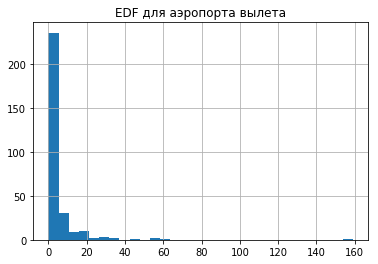

In [43]:
df_cat_origin=pd.concat([df['Origin'],df['Bool_delay']], axis=1)
df_origin=df_cat_origin.groupby(['Origin']).sum()
df_origin['Bool_delay'].hist(bins=intervals)
plt.title('EDF для аэропорта вылета')
plt.show()

Задержка значительно кластеризованы по крупным пересадочным хабам. Посотрим на рассеяние - все данные стандартизированы. 

In [44]:
description=df_origin.describe()
print(description)

       Bool_delay
count     297.000
mean        4.751
std        12.349
min         0.000
25%         0.000
50%         1.000
75%         4.000
max       159.000


Тоже самое с аэропортом прибытия.

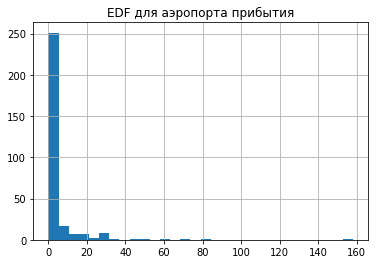

       Bool_delay
count     299.000
mean        4.719
std        13.152
min         0.000
25%         0.000
50%         1.000
75%         3.000
max       158.000


In [45]:
df_cat_origin=pd.concat([df['Dest'],df['Bool_delay']], axis=1)
df_origin=df_cat_origin.groupby(['Dest']).sum()
df_origin['Bool_delay'].hist(bins=intervals)
plt.title('EDF для аэропорта прибытия')
plt.show()

description=df_origin.describe()
print(description)

Таже самая кластеризация. Неудивительно. Сильное влияние порта на зедержку. 
По перевозчику согласно факторному анализу ситуация должна быть другая.

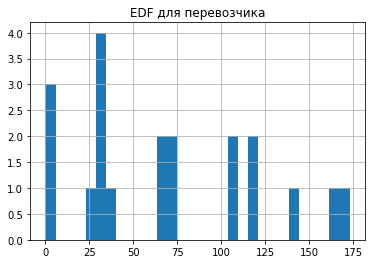

       Bool_delay
count      20.000
mean       70.550
std        53.574
min         0.000
25%        30.750
50%        68.500
75%       109.750
max       173.000


In [46]:
df_cat_origin=pd.concat([df['UniqueCarrier'],df['Bool_delay']], axis=1)
df_origin=df_cat_origin.groupby(['UniqueCarrier']).sum()
df_origin['Bool_delay'].hist(bins=intervals)
plt.title('EDF для перевозчика')
plt.show()

description=df_origin.describe()
print(description)

Стандартное отклонение в 5 раз выше, чем для признаков аэропорта. Факторный анализ подтвержден независимым методом. 
Действительно перевозчик имеет наименьший приоритет и влияние на зедержку. Но клиент не может повлиять на 
аэропорт отправления. Зато может немного повлиять на аэропорт прибытия, или перевозчика. В крупных городах есть несколько
портов приема. Клиент может выбрать другой, чтобы избежать отмены вылета и немного дольше проехаться на эксперссе.

Проверим, насколько надежна может быть подобная рекоммендательная система. 
Делаем скоринг по трем классификаторам независимо с прицелом на дальнейший стекинг в метамодель. 

Логистическая регрессия

In [47]:
print('Логистическая регрессия:')
kfold=KFold(n_splits=split_num);
results_logr=cross_val_score(LogisticRegression(solver='liblinear'),X,Y,cv=kfold)
print('Средняя точность кросс валидации='+str(round((results_logr.mean()),3))+'%')
print('Отклонение точности кросс валидации='+str(round((results_logr.std()),3))+'%')
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5)
model=LogisticRegression(solver='liblinear');model.fit(X_train,Y_train)
score_logr=model.score(X_test, Y_test)
print('Точность out of sample тестирования 50/50='+str(round((100*score_logr),3))+'%')

Логистическая регрессия:
Средняя точность кросс валидации=0.98%
Отклонение точности кросс валидации=0.003%
Точность out of sample тестирования 50/50=97.966%


Квазилинейный алгоритм - хорошо валидируется. Т.е. можно обойтись алгоритмами с минимумом гиперпараметров. Меньше - меньше риска оверфита. Нет необходимости нейронную сеть строить на этапе прототипа. Переход к Наивному Байесу. Хоть он и наивен,
зато нелинеен.

In [48]:
print('Наивный Байес:')
results_nb=cross_val_score(GaussianNB(),X,Y,cv=kfold)
print('Средняя точность кросс валидации='+str(round((results_nb.mean()),3))+'%')
print('Отклонение точности кросс валидации='+str(round((results_nb.std()),3))+'%')
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5)
model=GaussianNB();model.fit(X_train,Y_train)
score_nb=model.score(X_test, Y_test)
print('Точность out of sample тестирования 50/50='+str(round((100*score_nb),3))+'%')

Наивный Байес:
Средняя точность кросс валидации=0.98%
Отклонение точности кросс валидации=0.003%
Точность out of sample тестирования 50/50=98.06%


Самая слабая модель. Предполагает назависимость перевозчика от аэропорта. Формально это не так, но приближение работает.

Решающие деревья. Для улучшения экологии. Модель абсолютно независима по от предыдущих.

In [49]:
print('Решающее дерево:')
results_dt=cross_val_score(DecisionTreeClassifier(criterion='entropy'),X,Y,cv=kfold)
print('Средняя точность кросс валидации='+str(round((results_dt.mean()),3))+'%')
print('Отклонение точности кросс валидации='+str(round((results_dt.std()),3))+'%')
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5)
model=DecisionTreeClassifier(criterion='entropy');model.fit(X_train,Y_train)
score_dt=model.score(X_test,Y_test)
print('Точность out of sample тестирования 50/50='+str(round((100*score_dt),3))+'%')

Решающее дерево:
Средняя точность кросс валидации=0.979%
Отклонение точности кросс валидации=0.003%
Точность out of sample тестирования 50/50=97.831%


Результат - сопоставим. 

Посмотрим, какой результат даст ансамбль из моделей на основе голосования. Импортируем библиотеку "парламента" классификаторов. 

In [50]:
from sklearn.ensemble import VotingClassifier

Выводим среднюю точность по ансамблю моделей

In [51]:
estimators = []
a=LogisticRegression(solver='liblinear')
b=GaussianNB()
c=DecisionTreeClassifier(criterion='entropy')

estimators.append(('logistic',a))
estimators.append(('naive', b))
estimators.append(('svm', c))

ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print('Средняя точность кросс валидации по ансамблю:'+str(round((results.mean()),3))+'%')
print('Отклонение точности кросс валидации по ансамблю:'+str(round((results.std()),3))+'%')

Средняя точность кросс валидации по ансамблю:0.98%
Отклонение точности кросс валидации по ансамблю:0.003%


Ансамбль не дает значительного преимущества по скорингу на исторических данных. Но при загрузке новой таблицы и данных это преимущество может проявиться. 

Систематически задержки вносят пересадочные хабы или дешевые компании. Можно дать медианное время задержки в качестве опции - среднее не подходит. Задержка прибытия >80% определяется задержкой отправления, можно дать эту информацию сразу. ML на основании решающих деревьев ранжировал риск задержки по факторам: 1 - аэропорт A, 2 - аэропорт прибытия, 3 - перевозчик. ML классификаторы показали точность прогноза задержки >90%. По аэропорту прибытия и перевозчику на основании ID рейса можно ранжировать альтернативные рейсы. Более дешевые перевозчики - большие задержки, клиент захочет оптимизировать cost/risk, если после задержки включит платную опцию при выборе ранжировать рейс на основании стоимости и риска задержки. Опция оптимизации cost/risk - для upsell. 

Метрики комбинировал бы ARRR+RFM сегментацию. LTV клиента (первый сеанс-удаление). Конверсия в опции С1-С5 из ЛК: (подсказка задержки прибытия), (фильтр cost/risk), (до Вашего выхода в Gate осталось x мин), (сдать билет и выбрать другой рейс или ждите) - активация. Удержание - среднее время клиентской сессии в пространстве ЛК, частота открытия ЛК, время отрисовки ЛК, частота использования ЛК. A/B тест - монетизация опции выбрать альтернативный рейс по cost/risk в основном функционале и в ЛК. Функции ЛК - info о среднем времени задержки, рекоммендательная система, cost/risk optimizer, если задержка рейса, а клиент опаздывает (фича геолокации клиента и GPS координат аэропорта) - опция алерт сообщения о задержке отправления.

In [52]:
print('Спасибо за внимание.')

Спасибо за внимание.
